# Segmentación de una imagen T$_1$

Usaremos una imagen T$_1$ y una formulación *bayesiana* para la segmentación.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dipy.data import fetch_tissue_data, read_tissue_data
from dipy.segment.tissue import TissueClassifierHMRF

Desargamos el volumen:

In [2]:
fetch_tissue_data()
t1_img = read_tissue_data()
t1 = t1_img.get_data()
print('t1.shape (%d, %d, %d)' % t1.shape)

Creating new directory /home/david/.dipy/tissue_data
Download Progress: [##################################] 100.00%  of 1.37 MBDone.
Files copied in folder /home/david/.dipy/tissue_data
t1.shape (256, 256, 176)


Rebanadas muestra *axial* y *coronal*:

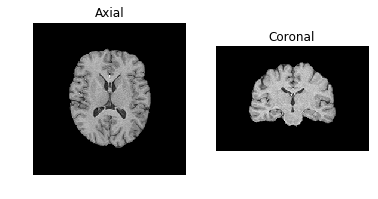

In [4]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
img_ax = np.rot90(t1[..., 89])
imgplot = plt.imshow(img_ax, cmap="gray")
a.axis('off')
a.set_title('Axial')
a = fig.add_subplot(1, 2, 2)
img_cor = np.rot90(t1[:, 128, :])
imgplot = plt.imshow(img_cor, cmap="gray")
a.axis('off')
a.set_title('Coronal')
plt.savefig('t1_image.png', bbox_inches='tight', pad_inches=0)

Definimos parámetros para la segmentación:

In [5]:
nclass = 3
beta = 0.1 # in [0, 0.5]

Segmentación:

In [ ]:
import time
t0 = time.time()

hmrf = TissueClassifierHMRF()
initial_segmentation, final_segmentation, PVE = hmrf.classify(t1, nclass, beta)

t1 = time.time()
total_time = t1-t0
print('Total time:' + str(total_time)) # ~ 5 min

Resultados:

>> Iteration: 0
>> Iteration: 1
>> Iteration: 2
>> Iteration: 3
>> Iteration: 4
>> Iteration: 5
>> Iteration: 6
>> Iteration: 7
>> Iteration: 8
>> Iteration: 9
>> Iteration: 10
>> Iteration: 11
>> Iteration: 12
>> Iteration: 13
>> Iteration: 14
>> Iteration: 15
>> Iteration: 16
>> Iteration: 17
>> Iteration: 18
>> Iteration: 19
>> Iteration: 20
Total time:337.05433773994446


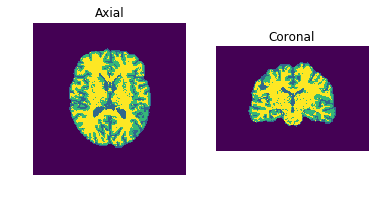

In [6]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
img_ax = np.rot90(final_segmentation[..., 89])
imgplot = plt.imshow(img_ax)
a.axis('off')
a.set_title('Axial')
a = fig.add_subplot(1, 2, 2)
img_cor = np.rot90(final_segmentation[:, 128, :])
imgplot = plt.imshow(img_cor)
a.axis('off')
a.set_title('Coronal')
plt.savefig('final_seg.png', bbox_inches='tight', pad_inches=0)

Mapeos de propbabilidad de cada clase:

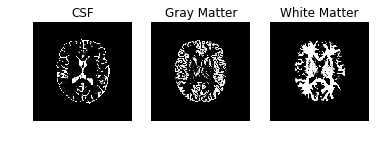

In [7]:
fig = plt.figure()
a = fig.add_subplot(1, 3, 1)
img_ax = np.rot90(PVE[..., 89, 0])
imgplot = plt.imshow(img_ax, cmap="gray")
a.axis('off')
a.set_title('CSF')
a = fig.add_subplot(1, 3, 2)
img_cor = np.rot90(PVE[:, :, 89, 1])
imgplot = plt.imshow(img_cor, cmap="gray")
a.axis('off')
a.set_title('Gray Matter')
a = fig.add_subplot(1, 3, 3)
img_cor = np.rot90(PVE[:, :, 89, 2])
imgplot = plt.imshow(img_cor, cmap="gray")
a.axis('off')
a.set_title('White Matter')
plt.savefig('probabilities.png', bbox_inches='tight', pad_inches=0)
plt.show()